<a href="https://colab.research.google.com/github/Ravi110296/Google-colab-projects/blob/main/Sentiment_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp('comments').vector.shape

(96,)

In [ ]:
nlp('no comments').vector.shape

(96,)

In [ ]:
sent = 'this is a test Tajmahal'

In [ ]:
for ents in nlp(sent).ents:
  print(ents,ents.label_)

Taj ORG


In [ ]:
!unzip -q /content/Sentiment.csv.zip

In [ ]:
!rm /content/Sentiment.csv.zip

In [ ]:
data = pd.read_csv('/content/Sentiment.csv')

In [ ]:
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
df = data[['candidate','text','sentiment']]

In [ ]:
df.head()

,candidate,text,sentiment
0,No candidate mentioned,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,Scott Walker,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,No candidate mentioned,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,No candidate mentioned,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,Donald Trump,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


<Axes: >

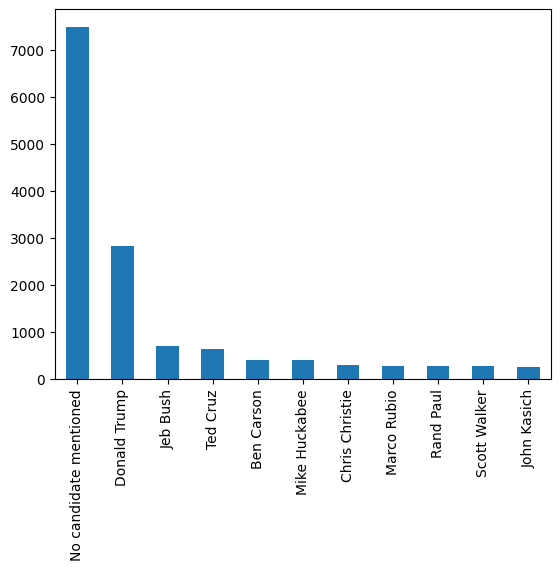

In [ ]:
df.candidate.value_counts().plot(kind = 'bar')

In [ ]:
df.text.head()

0    RT @NancyLeeGrahn: How did everyone feel about...
1    RT @ScottWalker: Didn't catch the full #GOPdeb...
2    RT @TJMShow: No mention of Tamir Rice and the ...
3    RT @RobGeorge: That Carly Fiorina is trending ...
4    RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
Name: text, dtype: object

In [ ]:
df.groupby(['candidate','sentiment']).count()

text
candidate              sentiment      
Ben Carson             Negative    186
                       Neutral      54
                       Positive    164
Chris Christie         Negative    218
                       Neutral      42
                       Positive     33
Donald Trump           Negative   1758
                       Neutral     446
                       Positive    609
Jeb Bush               Negative    589
                       Neutral      72
                       Positive     44
John Kasich            Negative     82
                       Neutral      47
                       Positive    113
Marco Rubio            Negative    105
                       Neutral      51
                       Positive    119
Mike Huckabee          Negative    237
                       Neutral      83
                       Positive     73
No candidate mentioned Negative   4724
                       Neutral    2087
                       Positive    680
Rand Paul              Negative    148
                       Neutral      60
                       Positive     55
Scott Walker           Negative    179
                       Neutral      38
                       Positive     42
Ted Cruz               Negative    221
                       Neutral     126
                       Positive    290

In [ ]:
pd.crosstab(df.candidate,df.sentiment)

sentiment,Negative,Neutral,Positive
candidate,,,
Ben Carson,186,54,164
Chris Christie,218,42,33
Donald Trump,1758,446,609
Jeb Bush,589,72,44
John Kasich,82,47,113
Marco Rubio,105,51,119
Mike Huckabee,237,83,73
No candidate mentioned,4724,2087,680
Rand Paul,148,60,55


<Axes: ylabel='sentiment'>

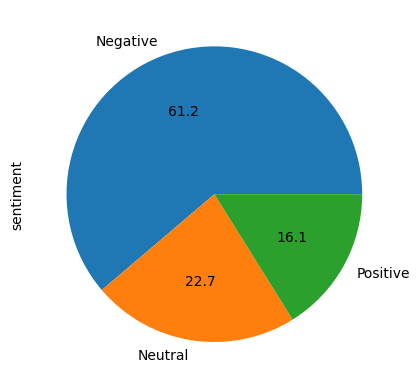

In [ ]:
df.sentiment.value_counts().plot.pie(autopct = '%0.1f')

In [ ]:
df['text'] = df['text'].str.replace('RT\s\@\w+:\s','',regex = True)

<ipython-input-55-4982435e500b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace('RT\s\@\w+:\s','',regex = True)


In [ ]:
import re
df['text'] = df['text'].apply(lambda x:re.sub('[^a-zA-Z0-9\s]',' ',x))

<ipython-input-58-e1b7b91b3d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x:re.sub('[^a-zA-Z0-9\s]',' ',x))


In [ ]:
df['text'] = df['text'].str.lower()

<ipython-input-64-976de3954d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


In [ ]:
df['text'].head()

0    how did everyone feel about the climate change...
1    didn t catch the full  gopdebate last night  h...
2    no mention of tamir rice and the  gopdebate wa...
3    that carly fiorina is trending    hours after ...
4     gopdebate w   realdonaldtrump delivered the h...
Name: text, dtype: object

In [ ]:
def non_stop_punct_data(data):
  nsp_words = []
  for word in nlp(data):
    if word.is_punct == False:
      if word.is_stop == False:
        if word.is_space == False:
          nsp_words.append(word.text)
  nsp_words = " ".join(nsp_words)
  return nsp_words

In [ ]:
non_stop_punct_data(df['text'][0])

'feel climate change question night exactly gopdebate'

In [ ]:
df['text'] = df['text'].apply(non_stop_punct_data)

<ipython-input-74-2696b30deb4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(non_stop_punct_data)


In [ ]:
df['text'].sample(5)

1466    hope amp american dream women means building f...
6432    rand paul reaching black vote like gopdebate h...
9289    best performance gopdebates order imho carly f...
3906    fox news post debate polling results megynkell...
2988    sherrod small amp kurtmetzger cure racism race...
Name: text, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_words = 2000
token = Tokenizer(max_words,' ')

In [ ]:
token.fit_on_texts(df['text'])

In [ ]:
len(token.index_word)

15743

In [ ]:
token.num_words

2000

In [ ]:
x = token.texts_to_sequences(df['text'])

In [ ]:
x[2],x[11]

([332, 1, 1483, 506, 346], [1633, 439, 1, 86, 422, 14, 251, 5, 2, 4])

In [ ]:
x_pad = pad_sequences(x)

In [ ]:
x_pad[2].shape,x_pad[11].shape

((25,), (25,))

In [ ]:
y = pd.get_dummies(df.sentiment)

In [ ]:
chkpt = tf.keras.callbacks.ModelCheckpoint('best_model',monitor = 'val_loss')

In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words,128,input_length = x_pad[0].shape[0]))
model.add(tf.keras.layers.LSTM(128,dropout = 0.4))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(3,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 128)           256000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 396035 (1.51 MB)
Trainable params: 396035 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile('adam','categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model.fit(x_pad,y,epochs = 20, validation_split = 0.1,callbacks=chkpt)

Epoch 1/20
391/391 [==============================] - 35s 83ms/step - loss: 0.8144 - accuracy: 0.6475 - val_loss: 0.6914 - val_accuracy: 0.6960
Epoch 2/20
391/391 [==============================] - 26s 67ms/step - loss: 0.6813 - accuracy: 0.7132 - val_loss: 0.6810 - val_accuracy: 0.6981
Epoch 3/20
391/391 [==============================] - 25s 64ms/step - loss: 0.6314 - accuracy: 0.7317 - val_loss: 0.7133 - val_accuracy: 0.6830
Epoch 4/20
391/391 [==============================] - 29s 74ms/step - loss: 0.5940 - accuracy: 0.7467 - val_loss: 0.7195 - val_accuracy: 0.7075
Epoch 5/20
391/391 [==============================] - 27s 69ms/step - loss: 0.5646 - accuracy: 0.7610 - val_loss: 0.7328 - val_accuracy: 0.6758
Epoch 6/20
391/391 [==============================] - 29s 74ms/step - loss: 0.5306 - accuracy: 0.7760 - val_loss: 0.7367 - val_accuracy: 0.6830
Epoch 7/20
391/391 [==============================] - 28s 72ms/step - loss: 0.5069 - accuracy: 0.7887 - val_loss: 0.7862 - val_accuracy:

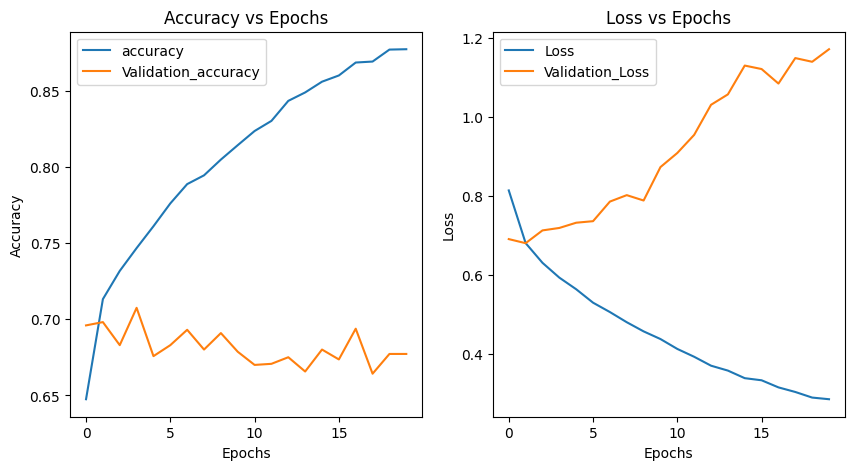

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'],label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/best_model')

In [ ]:
tweet = '''@Joe Biden @Donald Trump My vote will go to the person who addresses the major issues of the nation and
do not play the game of dirty politics.'''

In [ ]:
def pred_tweet(tweet):
  tweet = re.sub('[^a-zA-Z0-9]',' ',tweet)
  tweet = non_stop_punct_words(tweet)
  test = token.texts_to_sequences([tweet])
  test = test
  test = pad_sequences(test)
  pred = final_model.predict(test,verbose = 0)

  #------prediction_part---------#

  if (pred[0][0]>pred[0][1]) & (pred[0][0]>pred[0][2]):
    print('Negative')
  elif (pred[0][1]>pred[0][0]) & (pred[0][1]>pred[0][2]):
    print('Neutral')
  else:
    print('Positive')

(25,)